In [1]:
import numpy as np
import uproot
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow.keras.backend as K

from sificc_lib import AI, utils, Event, Simulation, root_files, DataModel
np.set_printoptions(precision=2, linewidth=85, suppress=True)

%matplotlib inline

In [2]:
# model name
model_name = 'model-2b-lsr'

shuffle_clusters = False

# load the training data
data = DataModel('data-enough-8cl.npz', 
                 batch_size = 128, validation_percent = .05, test_percent = .1)

# append an extra dimention to the features since we are using convolutional layers
data.append_dim = True

# create an AI instance
ai = AI(data, model_name)

ai.weight_type = 2
ai.weight_pos_x = 2.5
ai.weight_pos_y = 1
ai.weight_pos_z = 2
ai.weight_energy = 1.5
ai.weight_e_cluster = 1
ai.weight_p_cluster = 1

# randomly shuffle the training data
#np.random.seed(888)
#ai.data.shuffle(only_train=False)

# shuffle the clusters within each event
if shuffle_clusters:
    ai.data.shuffle_training_clusters()

In [3]:
# define and create the neural network architecture
ai.create_model(conv_layers=[128, 64], classifier_layers=[32], type_layers=[8], 
                pos_layers=[64,32], energy_layers=[32, 16], base_l2=.0001, limbs_l2=.0001)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, 72, 1)]      0                                            
__________________________________________________________________________________________________
conv_1 (Conv1D)                 (None, 8, 128)       1280        inputs[0][0]                     
__________________________________________________________________________________________________
conv_2 (Conv1D)                 (None, 8, 64)        8256        conv_1[0][0]                     
__________________________________________________________________________________________________
flatting (Flatten)              (None, 512)          0           conv_2[0][0]                     
______________________________________________________________________________________________

In [4]:
# compile the ai
ai.compile_model(learning_rate=0.0003)

# define the learning rate scheduler for the training phase
def lr_scheduler(epoch):
    if epoch < 90:
        return .0003
    elif epoch < 160:
        return .0001
    elif epoch < 180:
        return .00003
    elif epoch < 190:
        return .00001
    else:
        return .000003
l_callbacks = [
    keras.callbacks.LearningRateScheduler(lr_scheduler),
]

In [5]:
#LOADING
ai.load(model_name, optimizer=False)
ai.compile_model()

In [5]:
#TRAINING

In [6]:
%%time
# start the training
ai.train(epochs=200, shuffle=True, shuffle_clusters=shuffle_clusters, verbose=0, callbacks = l_callbacks)

# evaluate the AI on the training set
ai.model.evaluate(ai.data.train_x, ai.data.train_y, verbose=1)
print()

17443/17443 [==============================] - 67s 4ms/step - loss: 3.5529 - e_cluster_loss: 0.0307 - p_cluster_loss: 0.0764 - type_loss: 0.2733 - pos_x_loss: 0.0393 - pos_y_loss: 1.1009 - pos_z_loss: 0.0452 - energy_loss: 1.0079 - e_cluster__cluster_accuracy: 0.9570 - p_cluster__cluster_accuracy: 0.8936 - type__type_accuracy: 0.8829 - type__type_tp_rate: 0.8366

CPU times: user 22h 3min 46s, sys: 9min 15s, total: 22h 13min 1s
Wall time: 22h 15min 57s


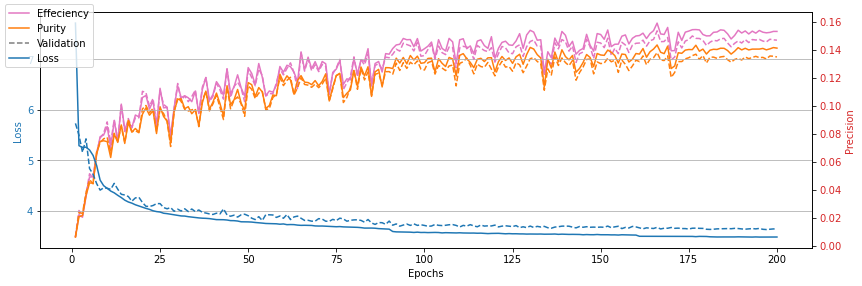

In [6]:
# plot the training loss
ai.plot_training_loss(smooth=False)

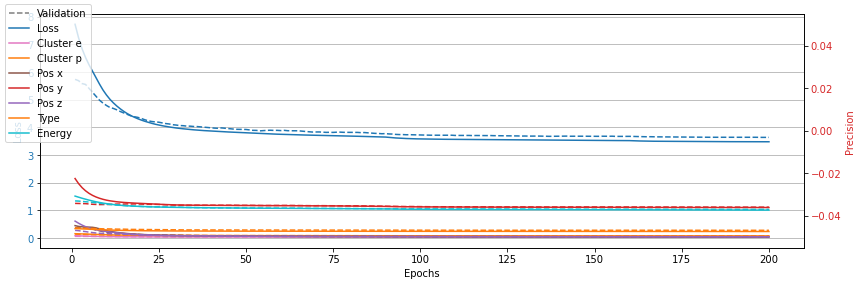

In [7]:
ai.plot_training_loss(mode = 'loss')

In [8]:
# evaluate the AI on the test dataset
ai.evaluate()

AI model
  Loss:        3.45655
    -Type:         0.27309 *  2.00 = 0.54619
    -Pos X:        0.03541 *  2.50 = 0.08854
    -Pos Y:        1.08336 *  1.00 = 1.08336
    -Pos Z:        0.04034 *  2.00 = 0.08067
    -Energy:       0.96894 *  1.50 = 1.45340
    -Cls e:        0.03097 *  1.00 = 0.03097
    -Cls p:        0.07578 *  1.00 = 0.07578
  Accuracy:    0.88271
    -TP rate:      0.83581
    -Cls e rate:   0.95581
    -Cls p rate:   0.89239
  Efficiency:  0.15017
  Purity:      0.13774
  Euc mean:   11.10979
  Euc std:    29.15231

Reco
  Accuracy:    0.64432
    -TP rate:      0.75151
  Efficiency:  0.10441
  Purity:      0.05890
  Euc mean:   20.92661
  Euc std:    49.07857


In [1]:
ai.savefigpath = '/home/home2/institut_3b/profe/Data/SiFiCCNN/21-06_EventAnalysis_ClusterNumbers_EnergyDepo/model-2b-lsr/EnergyDeposition/'
ai.events_prediction_analysis('all-events', save = True)

NameError: name 'ai' is not defined

 0.15017 Total efficiency
 0.13774 Total purity
 65668 All valid events
  2763 Correctly recon./ident. events
 18399 All true Compton events
 20059 NN pred Compton events
 15378 NN type-matched events
    7450 Type matched, pos energy mismatched 
    5304 Type and pos matched 
    1431 Type and energy matched 


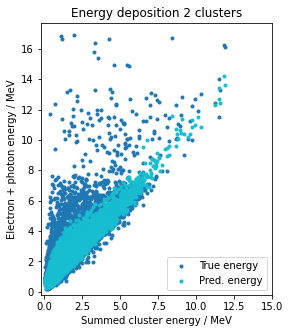

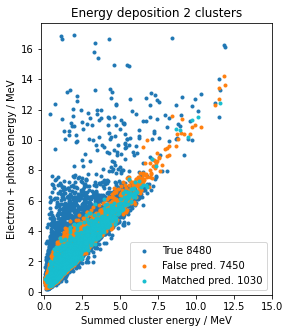

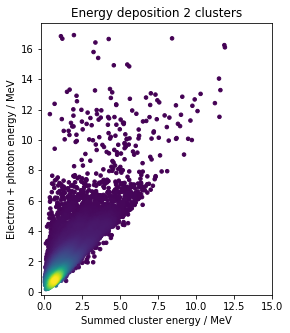

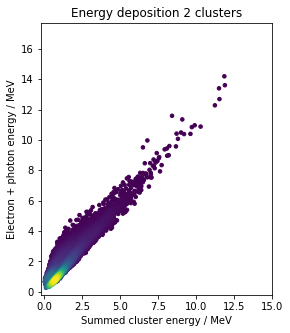

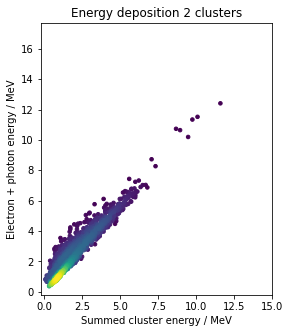

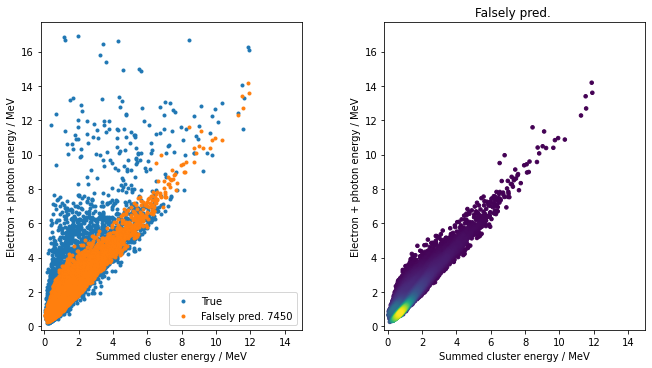

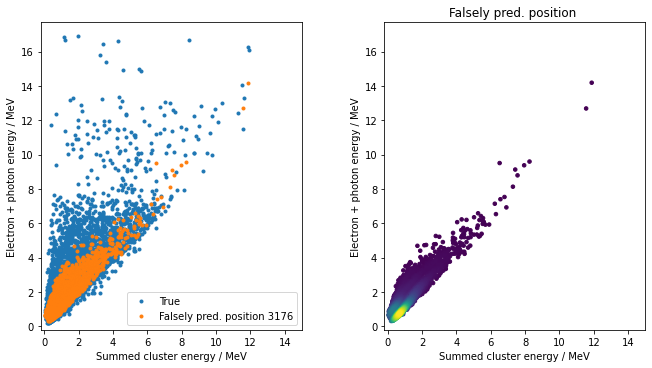

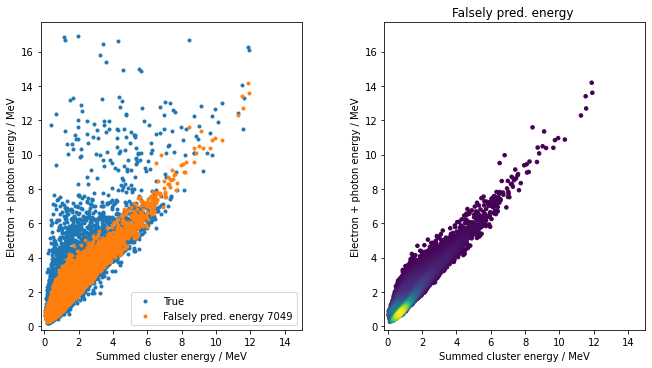

 Prediction of x positions 
8480.00000 Matched type number 
5304.00000 Matched position number 
5304.00000 Matched position number and matched type
 0.62547 Matched position from matched type 
    8055 Pred e in scatterer 
     404 Pred p in scatterer 
    7838 Matched e in scat 
     331 Matched p in scat 
    7920 True e in scatterer 
     560 True p in scatterer 
     560 True e in abs 
    7920 True p in abs 
     401 Pred e in abs 
    8050 Pred p in abs 
     327 Matched e in abs 
    7833 Matched p in abs 
    3376 Type matched, pos energy mismatched 
    2588 Type and pos matched 
    1538 Type and energy matched 


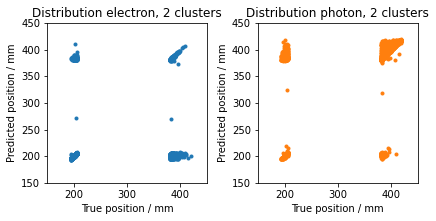

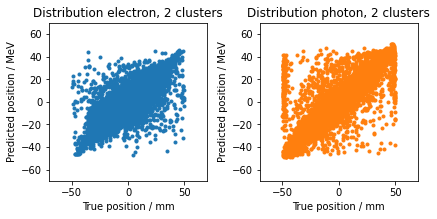

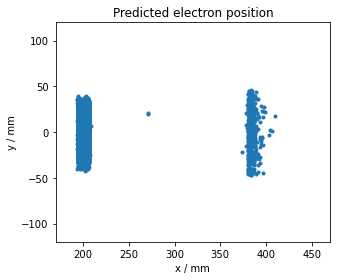

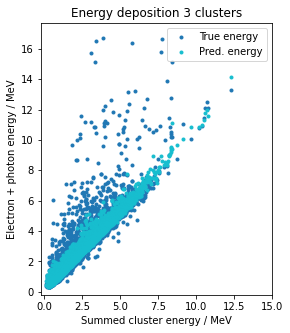

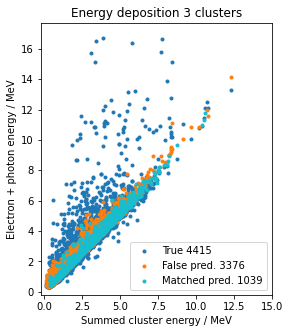

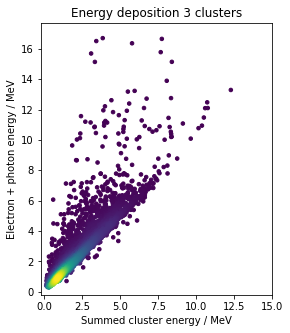

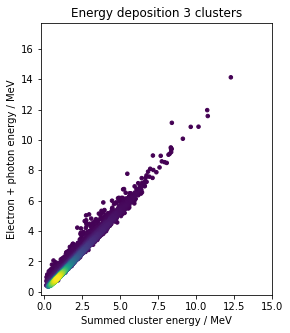

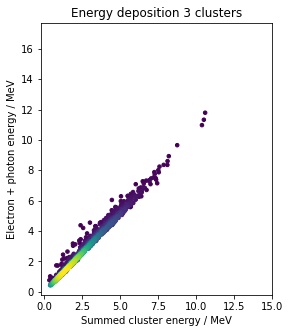

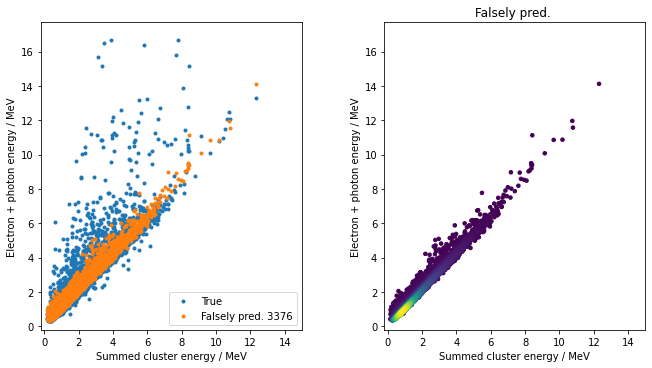

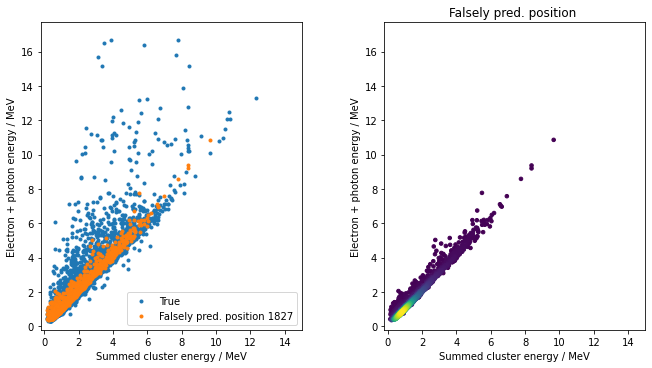

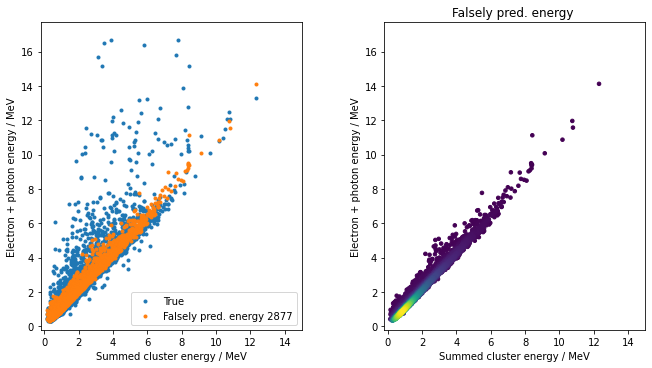

 Prediction of x positions 
4415.00000 Matched type number 
2588.00000 Matched position number 
2588.00000 Matched position number and matched type
 0.58618 Matched position from matched type 
    4366 Pred e in scatterer 
      33 Pred p in scatterer 
    4328 Matched e in scat 
      27 Matched p in scat 
    4346 True e in scatterer 
      69 True p in scatterer 
      69 True e in abs 
    4346 True p in abs 
      36 Pred e in abs 
    4351 Pred p in abs 
      29 Matched e in abs 
    4318 Matched p in abs 
    1242 Type matched, pos energy mismatched 
     940 Type and pos matched 
     755 Type and energy matched 


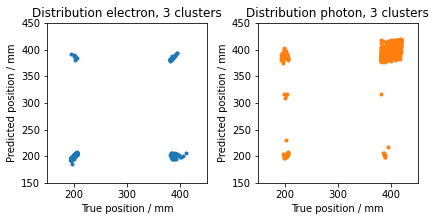

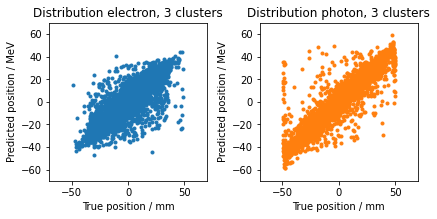

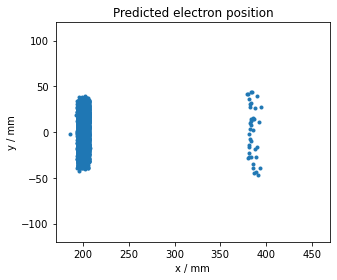

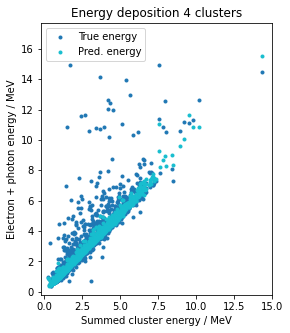

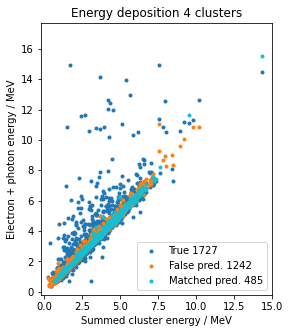

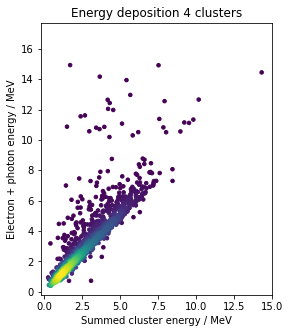

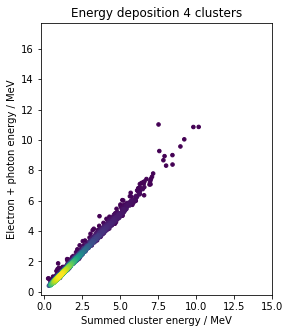

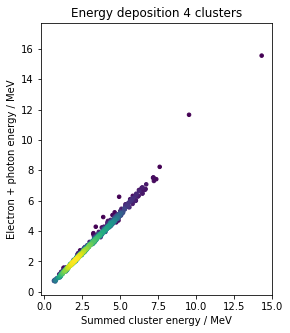

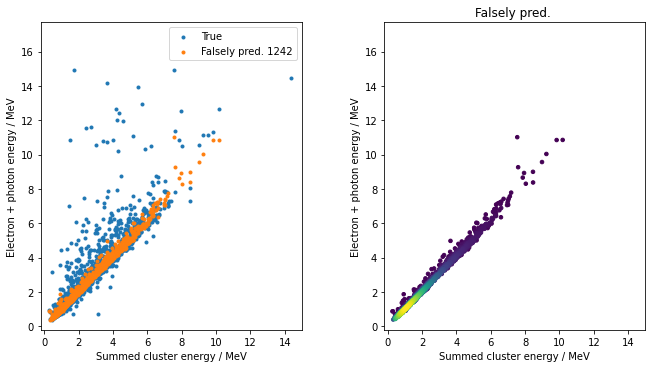

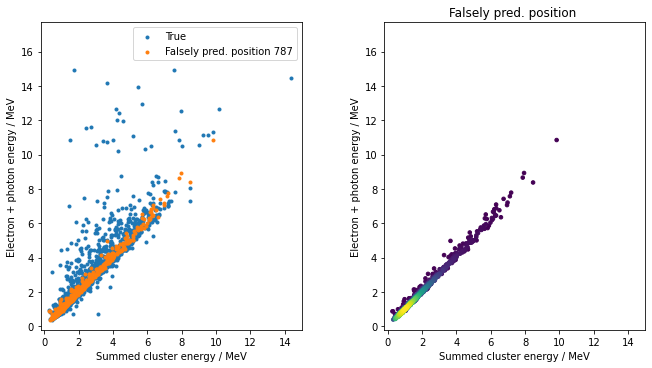

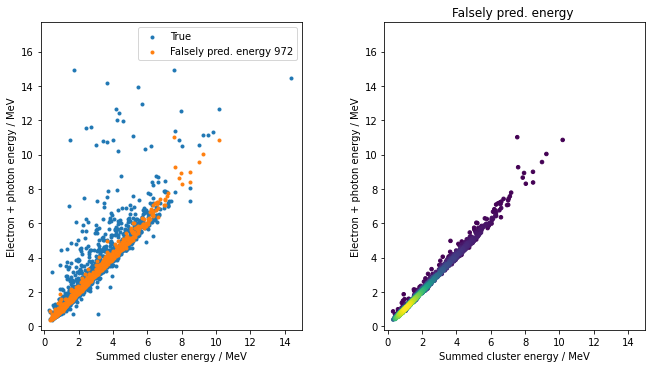

 Prediction of x positions 
1727.00000 Matched type number 
940.00000 Matched position number 
940.00000 Matched position number and matched type
 0.54430 Matched position from matched type 
    1716 Pred e in scatterer 
       1 Pred p in scatterer 
    1714 Matched e in scat 
       1 Matched p in scat 
    1723 True e in scatterer 
       4 True p in scatterer 
       4 True e in abs 
    1723 True p in abs 
       2 Pred e in abs 
    1678 Pred p in abs 
       2 Matched e in abs 
    1677 Matched p in abs 
     328 Type matched, pos energy mismatched 
     266 Type and pos matched 
     224 Type and energy matched 


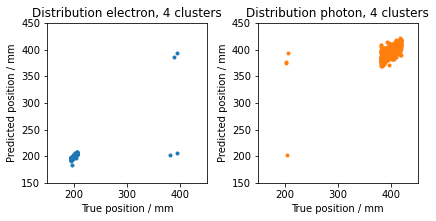

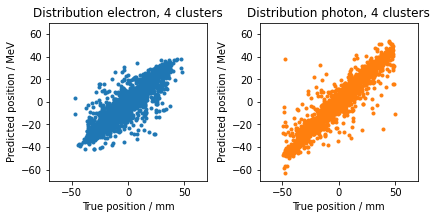

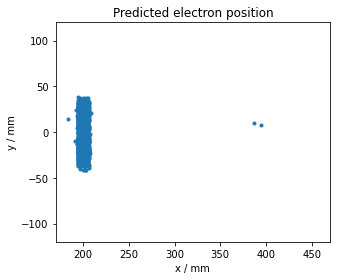

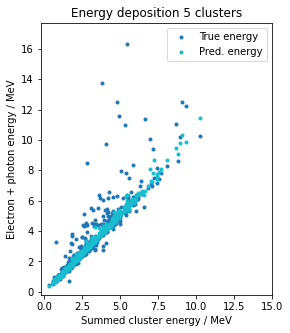

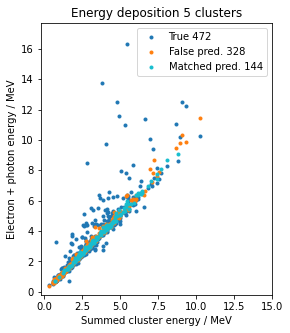

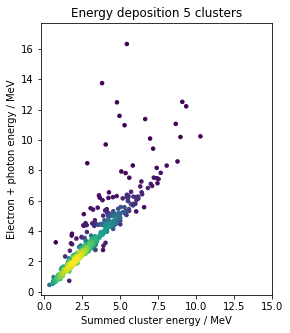

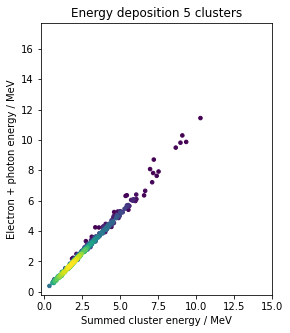

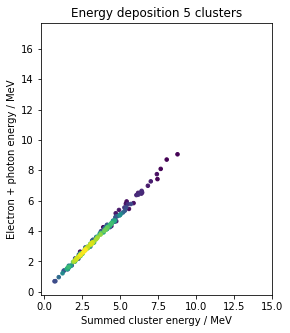

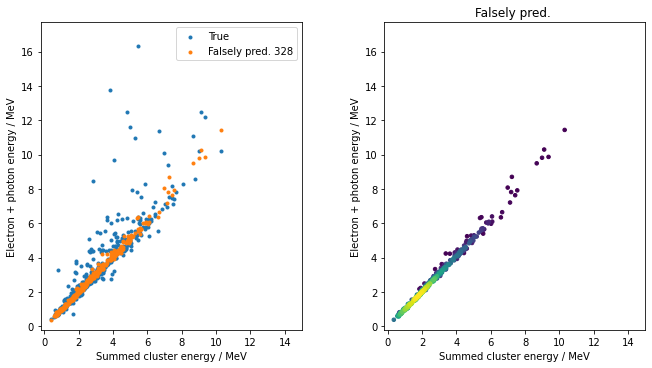

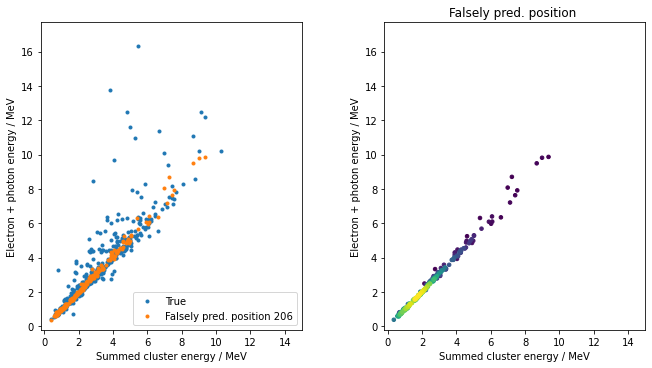

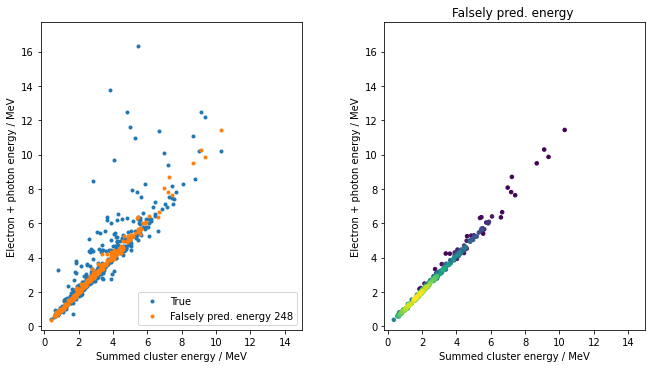

 Prediction of x positions 
472.00000 Matched type number 
266.00000 Matched position number 
266.00000 Matched position number and matched type
 0.56356 Matched position from matched type 
     469 Pred e in scatterer 
       0 Pred p in scatterer 
     467 Matched e in scat 
       0 Matched p in scat 
     470 True e in scatterer 
       2 True p in scatterer 
       2 True e in abs 
     470 True p in abs 
       0 Pred e in abs 
     458 Pred p in abs 
       0 Matched e in abs 
     456 Matched p in abs 
      87 Type matched, pos energy mismatched 
      66 Type and pos matched 
      65 Type and energy matched 


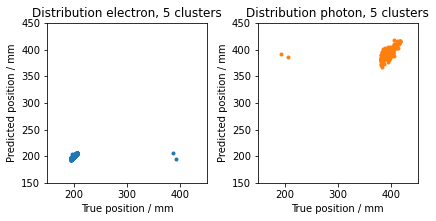

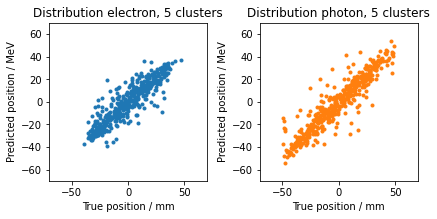

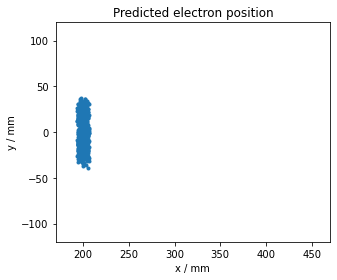

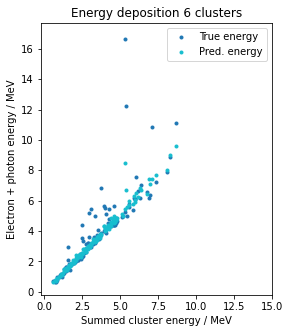

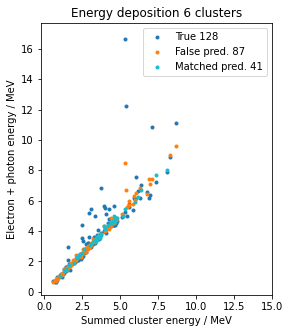

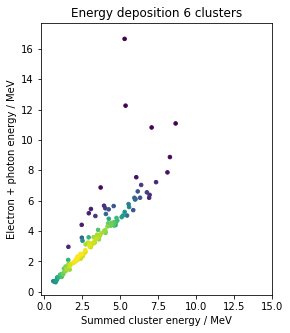

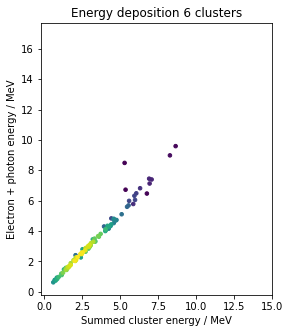

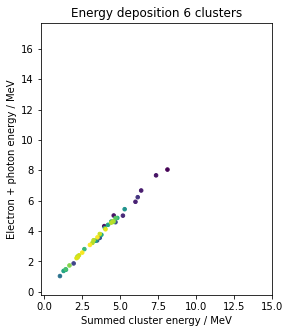

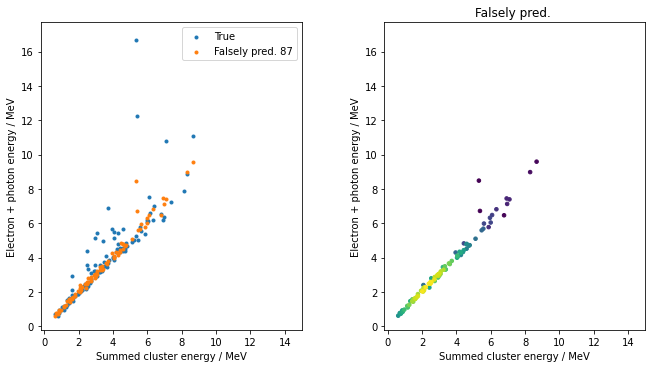

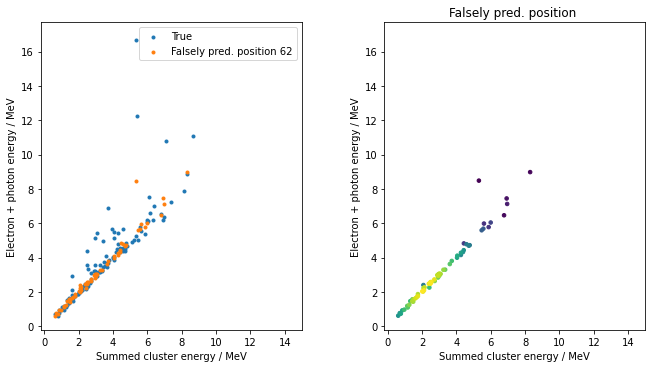

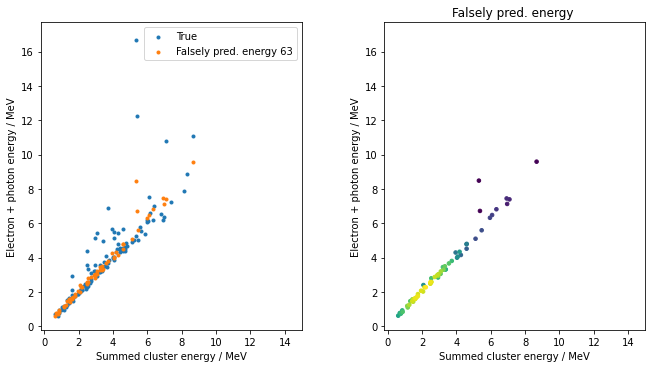

 Prediction of x positions 
128.00000 Matched type number 
66.00000 Matched position number 
66.00000 Matched position number and matched type
 0.51562 Matched position from matched type 
     127 Pred e in scatterer 
       0 Pred p in scatterer 
     126 Matched e in scat 
       0 Matched p in scat 
     127 True e in scatterer 
       1 True p in scatterer 
       1 True e in abs 
     127 True p in abs 
       0 Pred e in abs 
     122 Pred p in abs 
       0 Matched e in abs 
     121 Matched p in abs 
      18 Type matched, pos energy mismatched 
      10 Type and pos matched 
       7 Type and energy matched 


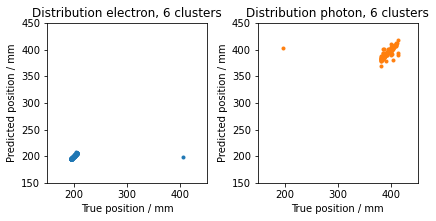

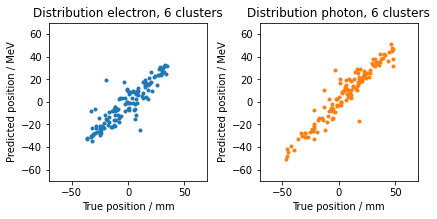

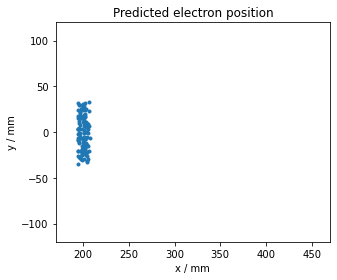

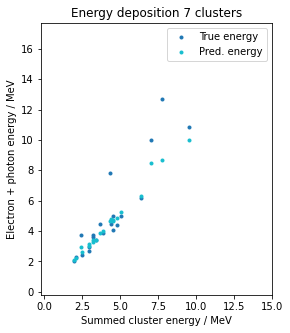

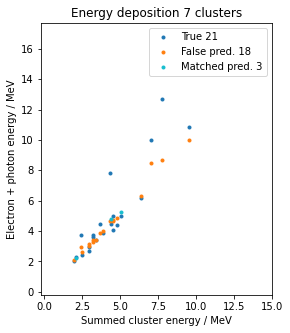

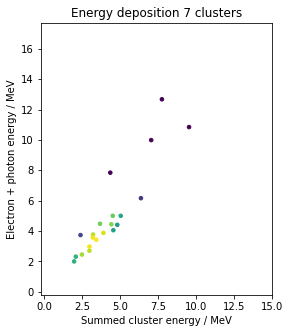

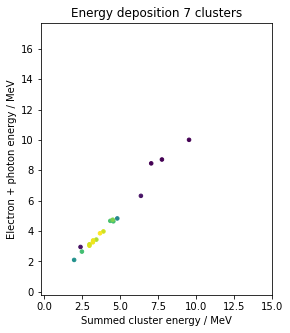

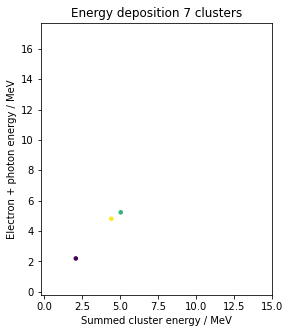

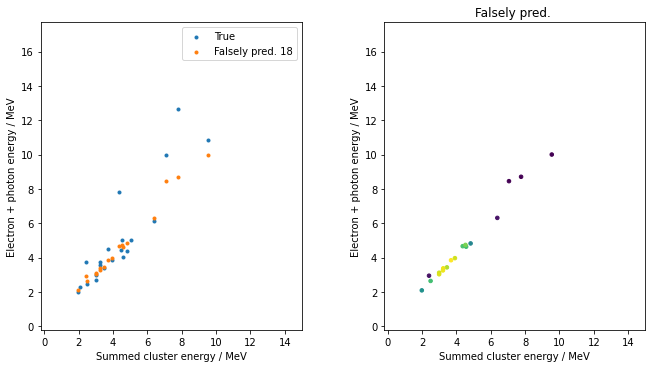

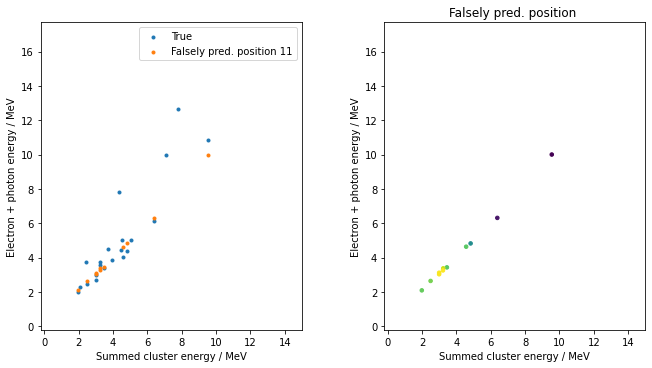

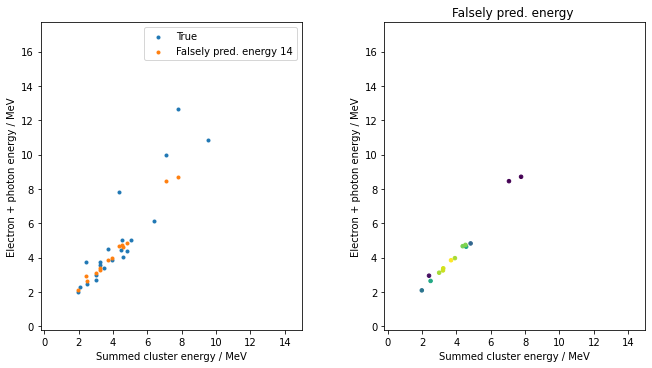

 Prediction of x positions 
21.00000 Matched type number 
10.00000 Matched position number 
10.00000 Matched position number and matched type
 0.47619 Matched position from matched type 
      20 Pred e in scatterer 
       0 Pred p in scatterer 
      20 Matched e in scat 
       0 Matched p in scat 
      21 True e in scatterer 
       0 True p in scatterer 
       0 True e in abs 
      21 True p in abs 
       0 Pred e in abs 
      21 Pred p in abs 
       0 Matched e in abs 
      21 Matched p in abs 
      10 Type matched, pos energy mismatched 
       3 Type and pos matched 
       7 Type and energy matched 


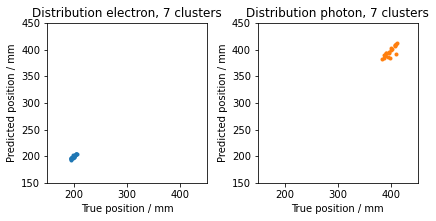

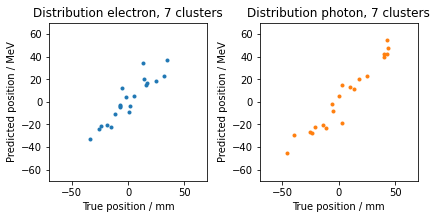

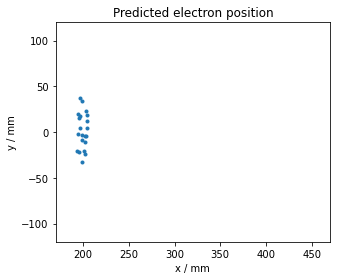

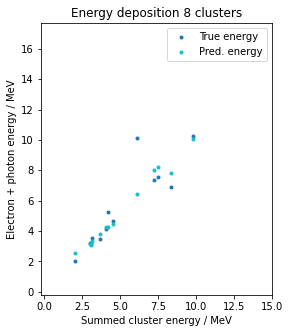

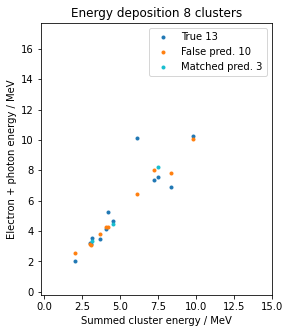

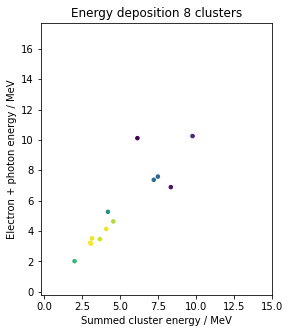

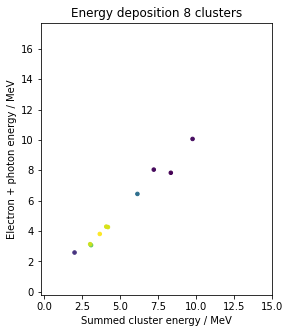

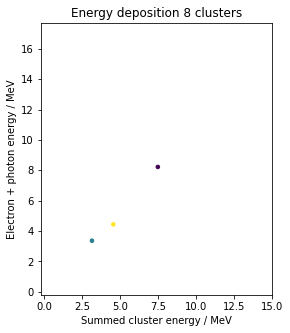

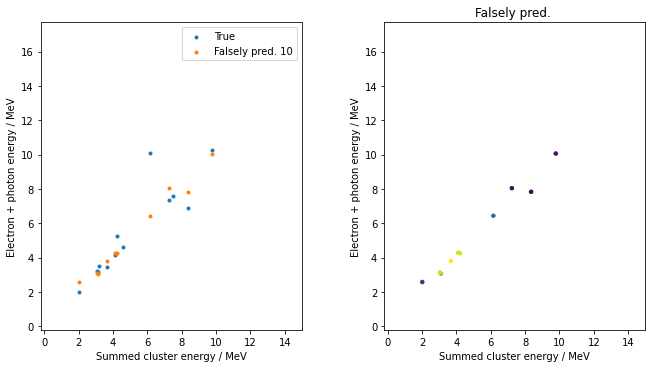

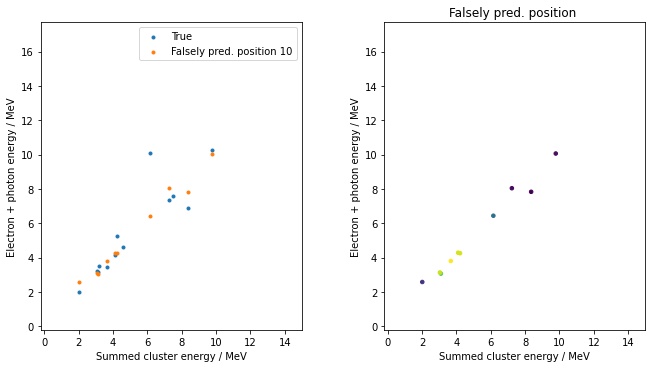

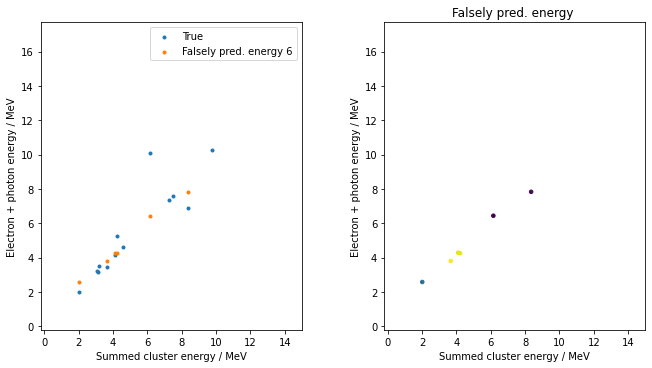

 Prediction of x positions 
13.00000 Matched type number 
 3.00000 Matched position number 
 3.00000 Matched position number and matched type
 0.23077 Matched position from matched type 
      11 Pred e in scatterer 
       0 Pred p in scatterer 
      11 Matched e in scat 
       0 Matched p in scat 
      13 True e in scatterer 
       0 True p in scatterer 
       0 True e in abs 
      13 True p in abs 
       0 Pred e in abs 
      12 Pred p in abs 
       0 Matched e in abs 
      12 Matched p in abs 


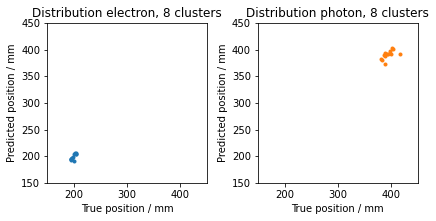

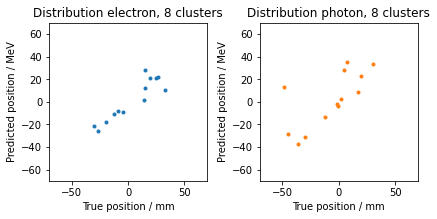

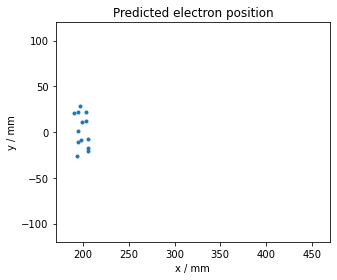

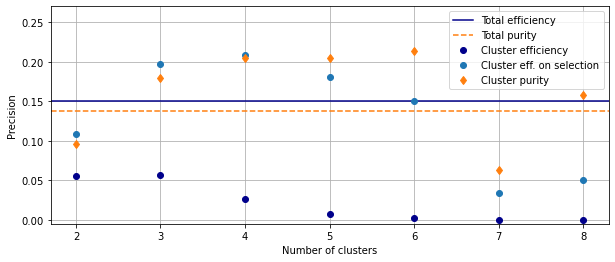

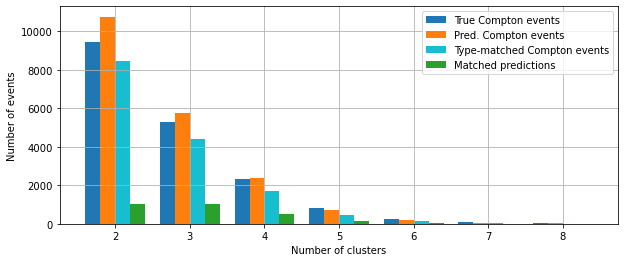

In [9]:
ai.events_prediction_analysis('cluster-numbers')

 0.15017 Total efficiency
 0.13774 Total purity
 65668 All valid events
  2763 Correctly recon./ident. events
 18399 All true Compton events
 20059 NN pred Compton events
 15378 NN type-matched events
Eff scat 0.05587260177183542
Eff clus 0.05598130333170281
No Eff scat 10739.0
No Eff cl 10765.0
No Eff scat type match 8459
No Eff cl   type match 8480


/.automount/home/home__home2/institut_3b/profe/Software/DeepLearning/neural-network/sificc_lib/AI.py:1232: RuntimeWarning: invalid value encountered in true_divide
  purity = np.sum(l_matches_length) / np.sum(y_pred[:,0])



 44515 events for 1 cluster matches in scat from  65668 events
  2658 matched events for 1 cluster matches in scat 
0.14446437 efficiency, 0.13774876 purity fo 1 cluster matches in scat 

 12830 events for 2 cluster matches in scat 
    86 matched events for 2 cluster matches in scat 
0.00467417 effiecency, 0.14075286 purity fo 2 cluster matches in scat 


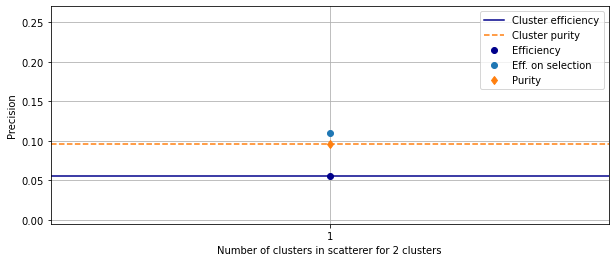

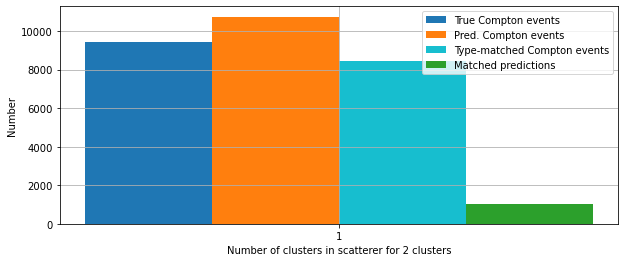

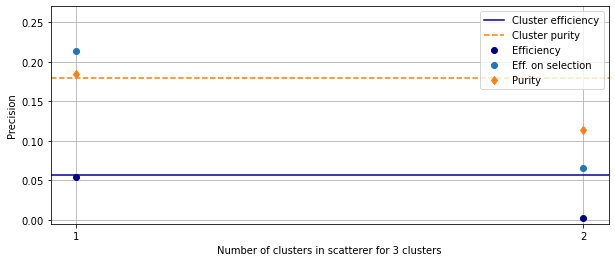

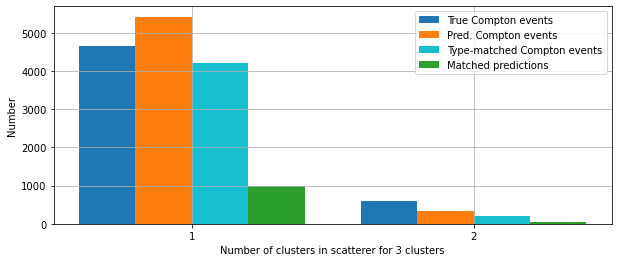

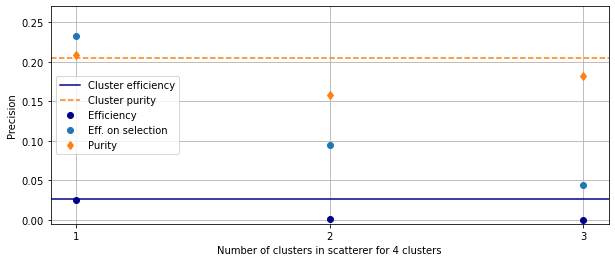

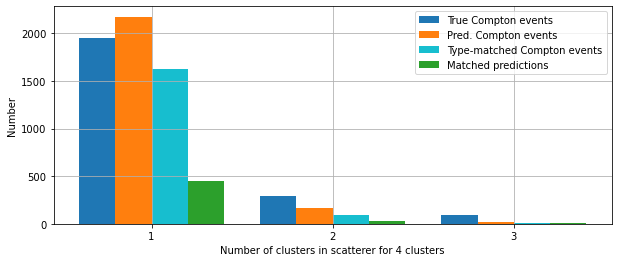

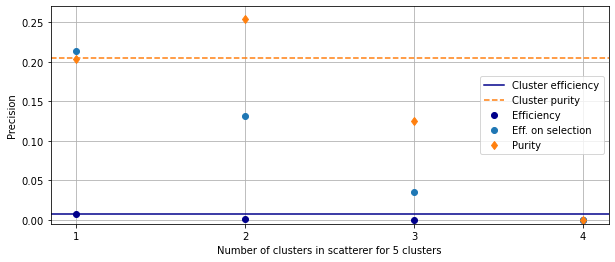

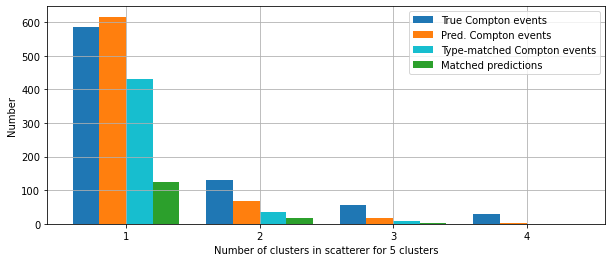

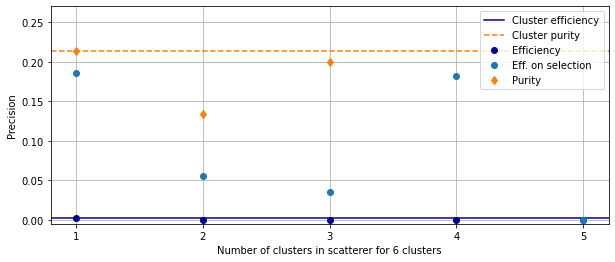

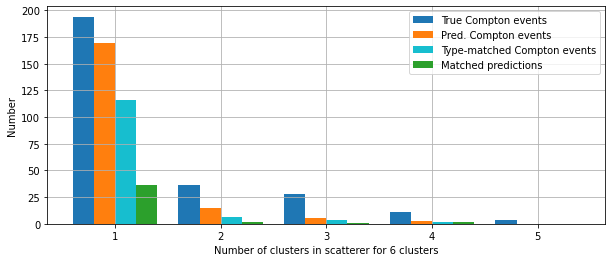

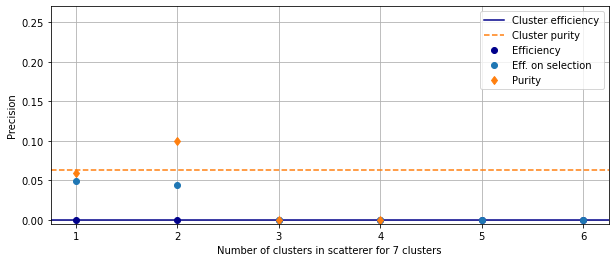

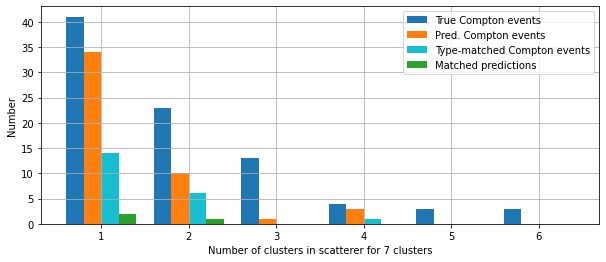

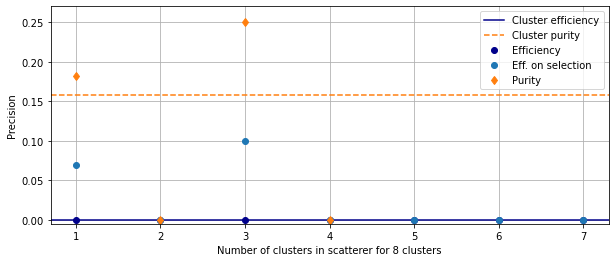

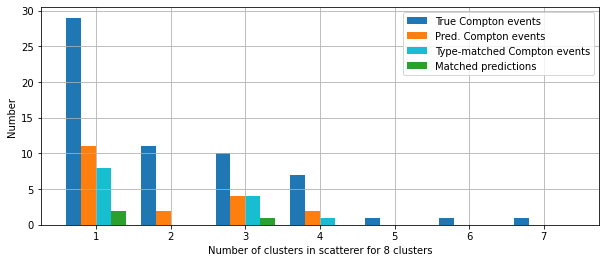

In [10]:
ai.events_prediction_analysis('cluster-distribution')

 0.15017 Total efficiency
 0.13774 Total purity
 65668 All valid events
  2763 Correctly recon./ident. events
 18399 All true Compton events
 20059 NN pred Compton events
 15378 NN type-matched events


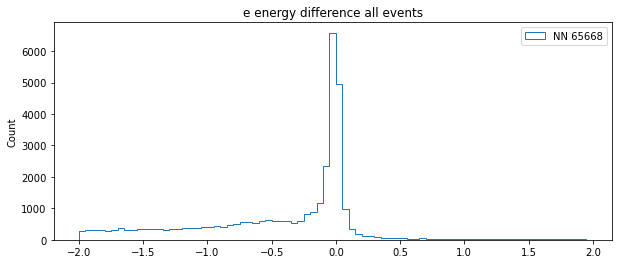

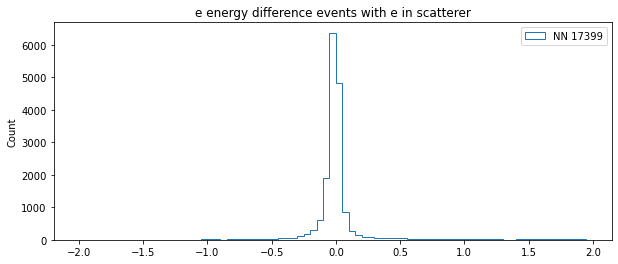

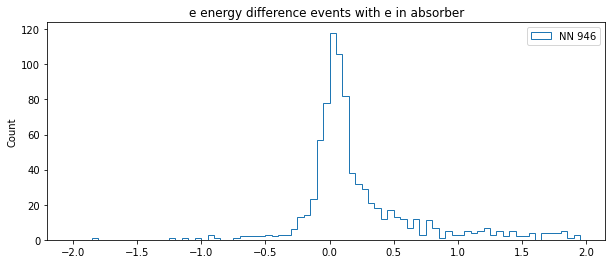

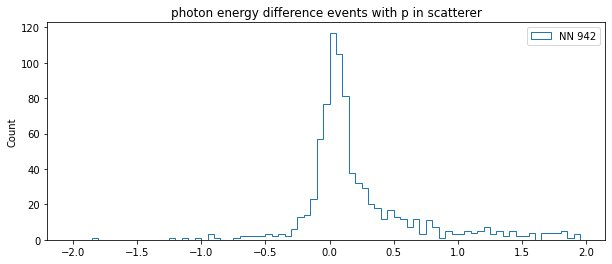

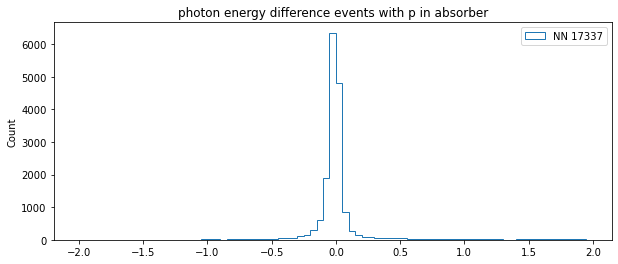

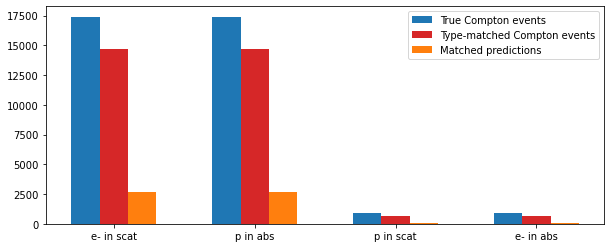

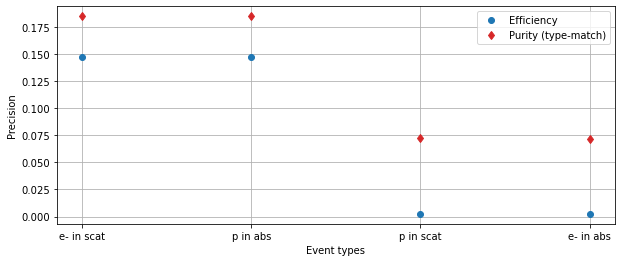

In [11]:
ai.events_prediction_analysis('e-scatterer')

In [9]:
# save the trained model
ai.save(file_name=model_name)